___
# Ciência dos Dados - PROJETO 2

___
## Nome 1: Lucas Leal Vale

## Nome 2: Rafael Almada


___

## 1. Problema

O Classificador Naive-Bayes, o qual se baseia no uso do teorema de Bayes, é largamente utilizado em filtros anti-spam de e-mails. O classificador permite calcular qual a probabilidade de uma mensagem ser SPAM considerando as palavras em seu conteúdo e, de forma complementar, permite calcular a probabilidade de uma mensagem ser HAM dada as palavras descritas na mensagem.

Para realizar o MVP (minimum viable product) do projeto, você precisa programar uma versão do classificador que "aprende" o que é uma mensagem SPAM considerando uma base de treinamento e comparar o desempenho dos resultados com uma base de testes. 


___
## 2. Separação da base de dados em Treinamento e Teste

A base de dados deve ser separada em duas partes, aleatoriamente, considerando: 
    
    75% dos dados para a parte Treinamento; e
    25% dos dados para a parte Teste.

In [1]:
# Importando bibliotecas
import pandas as pd
import os
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
#lendo o Dataframe Base
df=pd.read_excel('spamhamV2.xlsx', sep=',')

In [3]:
# Filtrando o DataFrame
df['Email']=df.Email.str.replace(':','')
df['Email']=df.Email.str.replace('"','')
df['Email']=df.Email.str.replace("'","")
df['Email']=df.Email.str.replace('(','')
df['Email']=df.Email.str.replace(')','')
df['Email']=df.Email.str.replace('\n','')
df['Email']=df.Email.str.replace(',','')
df['Email']=df.Email.str.replace('.','')
df['Email']=df.Email.str.lower()


In [4]:
#Divindo cada email em listas de palavras, para facilitar a implementação posterior no código de bayes
df['Email']=df['Email'].str.split(pat=None,n=-1,expand=False)


In [5]:
#Separação da base de dados
dfTreinamento=df.sample(n=None, frac=0.75, replace=False, weights=None, random_state=None, axis=None)
dfTeste=df.sample(n=None, frac=0.25, replace=False, weights=None, random_state=None, axis=None)

In [6]:
#Salvando as variaveis dos dois dataframes criados em arquivos csv
dfTreinamento.to_csv('var_Treinamento.csv')
dfTeste.to_csv('var_Teste.csv')

___
## 3. Classificador Naive-Bayes

In [7]:
#Calculando a probabilidade de ser Spam dentro do dataframe de Treinamento
Spam=dfTreinamento[dfTreinamento.Class=='spam']
Pspam=len(Spam)/len(dfTreinamento['Class'])
Pspam

0.13591768365637713

In [8]:
#Calculando a probabilidade de ser Ham dentro do dataframe de Treinamento
Ham=dfTreinamento[dfTreinamento.Class=='ham']
Pham=1-Pspam
Pham

0.8640823163436229

In [9]:
#Calculando a frequencia de cada palavra dentro do Dataframe Treinamento
dfTotal=dfTreinamento['Email'].sum(axis=None, skipna=None, level=None, numeric_only=None)
serie = pd.Series(dfTotal)
palavras = serie.value_counts()


In [10]:
#Calculando a probabilidade de uma palavra acontecer se a mensagem na base treinamento é considerada SPAM
dfTreiSpam=dfTreinamento[dfTreinamento.Class=='spam']
dfTreiSpam=dfTreiSpam['Email'].sum(axis=None, skipna=None, level=None, numeric_only=None)
SpamSeries=pd.Series(dfTreiSpam)
PS=SpamSeries.value_counts()
PalavrasSpam=(PS+1)/(len(SpamSeries)+len(palavras))

In [11]:
#Calculando a probabilidade de uma palavra acontecer se a mensagem na base treinamento é considerada Ham
dfTreiHam=dfTreinamento[dfTreinamento.Class=='ham']
dfTreiHam=dfTreiHam['Email'].sum(axis=None, skipna=None, level=None, numeric_only=None)
HamSeries=pd.Series(dfTreiHam)
PH=HamSeries.value_counts()
PalavrasHam=(PH+1)/(len(HamSeries)+len(palavras))

In [12]:
# Implementando o Teorema de Naive-Bayes
def Bayes(email):   
    var_s=Pspam
    var_h=Pham
    
    for i in email:
        if i in (PalavrasHam):
            var_h*=PalavrasHam[i]
        else:
            var_h*=1/(len(palavras))
    
    for i in email:
        if i in PalavrasSpam:
            var_s*=PalavrasSpam[i]
        else:
            var_s*=1/(len(palavras))
    
    if var_s > var_h:
        return("spam")
    else:
        return("ham")

In [13]:
# Função que implementa em nosso dataframe uma coluna com os resultados do classificador
def Test(Teste):
    frase = Teste.Email
    return Bayes(frase)

T = dfTeste.apply(Test,axis=1)
dfTeste["Resultados"] = T
dfTeste.head()

,Email,Class,Resultados
657,"[you, will, be, in, the, place, of, that, man]",ham,ham
5475,"[dhoni, have, luck, to, win, some, big, titles...",ham,spam
3812,"[pls, i, wont, belive, godnot, only, jesus]",ham,ham
1471,"[oh, u, must, have, taken, your, real, valenti...",ham,ham
1541,"[do, u, konw, waht, is, rael, friendship, im, ...",ham,ham


In [14]:
dfTeste['Class'].value_counts()

ham     1211
spam     182
Name: Class, dtype: int64

In [15]:
dfTeste['Resultados'].value_counts()

ham     1198
spam     195
Name: Resultados, dtype: int64

In [16]:
# Plotando tabela cruzada entre o que ja estava classificado e o que nosso classificador trouxe como resposta
pd.crosstab(dfTeste.Class,dfTeste.Resultados)

Resultados,ham,spam
Class,,
ham,1173,38
spam,25,157


In [17]:
FalsosPosi=(pd.crosstab(dfTeste.Class,dfTeste.Resultados).spam[0])/((pd.crosstab(dfTeste.Class,dfTeste.Resultados).spam[0])+(pd.crosstab(dfTeste.Class,dfTeste.Resultados).ham[0]))
print('Falso Positivo')
FalsosPosi

Falso Positivo


0.031379025598678778

In [18]:
PosiVerd=(pd.crosstab(dfTeste.Class,dfTeste.Resultados).spam[1])/(pd.crosstab(dfTeste.Class,dfTeste.Resultados).spam[1]+(pd.crosstab(dfTeste.Class,dfTeste.Resultados).ham[1]))
print('Positivo Verdadeiro')
PosiVerd                                                               

Positivo Verdadeiro


0.86263736263736268

In [19]:
FalsoNeg=(pd.crosstab(dfTeste.Class,dfTeste.Resultados).ham[1])/(pd.crosstab(dfTeste.Class,dfTeste.Resultados).ham[1]+(pd.crosstab(dfTeste.Class,dfTeste.Resultados).spam[1]))
print('Falso Negativo')
FalsoNeg

Falso Negativo


0.13736263736263737

In [20]:
NegVerd=(pd.crosstab(dfTeste.Class,dfTeste.Resultados).ham[0])/(pd.crosstab(dfTeste.Class,dfTeste.Resultados).spam[0]+(pd.crosstab(dfTeste.Class,dfTeste.Resultados).ham[0]))
print('negativo verdadeiro')
NegVerd

negativo verdadeiro


0.96862097440132122

 Possuimos mais negativos verdadeiros do que Positivos Negativos, ou seja, o nosso classificador acertou mais quando o dado era Ham e os marcou como Ham do que quando o dado era Spam e os marcou com Spam.
 Com uma pequena diferenca entre eles de respectivamente  87.6% para positivos verdadeiros e 96.9% para negativos verdadeiros
Apesar dessas margens o consideramos um classificador eficiente.

___
## 4. Curva ROC

In [21]:
# Função de Naive-Bayes adaptada para o Teorema ROC
def Bayes2(email):   
    var_s=Pspam
    var_h=Pham
    
    for i in email:
        if i in PalavrasHam:
            var_h*=PalavrasHam[i]
        else:
            var_h*=1/(len(palavras))
    
    for i in email:
        if i in PalavrasSpam:
            var_s*=PalavrasSpam[i]
        else:
            var_s*=1/(len(palavras))        
    
    if var_s > k*(var_s+var_h):#ps/ps+ph>0.5
        return("spam")  
    else:
        return("ham")

In [22]:
# Função que implementa em nosso dataframe uma coluna com os resultados do classificador
def Test2(dfTeste):
    frase = dfTeste.Email
    return Bayes2(frase) 
k=0.1
T = dfTeste.apply(Test2,axis=1)
dfTeste["Bayes"] = T
dfTeste.head()

,Email,Class,Resultados,Bayes
657,"[you, will, be, in, the, place, of, that, man]",ham,ham,ham
5475,"[dhoni, have, luck, to, win, some, big, titles...",ham,spam,spam
3812,"[pls, i, wont, belive, godnot, only, jesus]",ham,ham,ham
1471,"[oh, u, must, have, taken, your, real, valenti...",ham,ham,ham
1541,"[do, u, konw, waht, is, rael, friendship, im, ...",ham,ham,ham


In [23]:
# Criação das listas de especificidade e sensibilidade, alem do coeficiente de correlação Mattheus para os plots de grafico e melhor valor para a curva ROC.
L1=[] #especificidade
L2=[] #sensibilidade
phi=[] # coeficiente de correlação de Matthews
for k in np.arange(0,1,0.01): 
    T = dfTeste.apply(Test2,axis=1)
    dfTeste["Bayes"] = T
    crosst=pd.crosstab(dfTeste.Class,dfTeste.Bayes)
    if hasattr( crosst,"ham") and hasattr(crosst,"spam"):
        NegVerd=crosst.ham["ham"]/(crosst.ham["ham"]+ crosst.spam["ham"])
        PosiVerd=crosst.spam["spam"]/(crosst.ham["spam"]+ crosst.spam["spam"])
        pc1=(crosst.spam["spam"]*crosst.ham["ham"])-(crosst.spam["ham"]*crosst.ham["spam"])
        pc2=(crosst.spam["spam"]+crosst.ham["spam"])*(crosst.spam["spam"]+crosst.spam["ham"])*(crosst.ham["ham"]+crosst.ham["spam"])*(crosst.ham["ham"]+crosst.spam["ham"])
        L1.append(1-NegVerd)
        L2.append(PosiVerd)
        phi.append(pc1/math.sqrt(pc2))
    elif hasattr(crosst,"ham") and not hasattr( crosst,"spam"):
        NegVerd=1
        PosiVerd=0
        pc=0
        L1.append(1-NegVerd)
        L2.append(PosiVerd)
        phi.append(pc)
    elif hasattr( crosst,"spam") and not hasattr( crosst,"ham"):
        NegVerd=0
        PosiVerd=1
        pc=0
        L1.append(1-NegVerd)
        L2.append(PosiVerd)
        phi.append(pc)

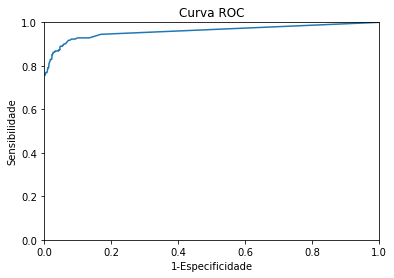

In [24]:
#plotando a curva ROC
plt.plot(L1,L2)
plt.axis([0,1,0,1])
plt.title("Curva ROC")
plt.xlabel("1-Especificidade")
plt.ylabel("Sensibilidade")
plt.show()

In [25]:
pc=phi.index(max(phi))/100
print("Através do Coeficiente de Correlação de Matthews, calculado para cada ponto da curva, o melhor ponto de corte é " +str(pc))

Através do Coeficiente de Correlação de Matthews, calculado para cada ponto da curva, o melhor ponto de corte é 0.98


A curva ROC (Receiver Operating Characteristic) nos apresenta a qualidade do nosso qualificador, baseada nos valores de Positivos Verdadeiros e nos de Negativos Verdadeiros.

Quanto mais próxima de uma reta for, pior o classificador é, dado que a sensibilidade será igual à especificidade, e quanto mais próximo de uma curva perpendicular no canto superior esquerdo, mais próximo da perfeição o classificador será. Caso a curva tenda a uma curva perpendicular no canto inferior direito do gráfico, o classificador pode ser considerado uma péssima aplicação de Naive-Bayes.

No nosso caso, a curva ROC ficou bem próxima do que é considerada como perfeita, se provando assim ser um classificador muito bom e, logo, muito efetivo. É claro que nunca chegará à perfeição, sempre haverão alguns erros na classificação, mas estes são erros já previstos, pois sempre haverão alguns poucos que tendem a ser Spam, quando na verdade são Ham.

___
## 5. Qualidade do Classificador alterando a base de treinamento

In [26]:
# Testando a qualidade do classificador altarando a base de treinamento.
PV=[] #porcentagem de positivos verdadeiros
NV=[] #porcentagem de negativos verdadeiros
for i in range(500):
    #Separação da base de dados
    Treinamento = df.sample(n=None, frac=0.75, replace=False).reset_index()
    Teste = df.sample(n=None, frac=0.25, replace=False).reset_index()
    Treinamento = Treinamento.drop(["index"],axis = 1)
    Teste = Teste.drop(["index"],axis = 1)
    
    #Aplicação do Naive-Bayes
    T = Teste.apply(Test,axis=1)
    Teste["Bayes"] = T
    
    #salvando as porcentagens
    crosst=pd.crosstab(Teste.Class,Teste.Bayes)
    NegVerd=crosst.spam["spam"]/(crosst.spam["spam"]+crosst.spam["ham"])*100
    PosiVerd=crosst.ham["ham"]/(crosst.ham["ham"]+crosst.ham["spam"])*100
    PV.append(NegVerd)
    NV.append(PosiVerd)

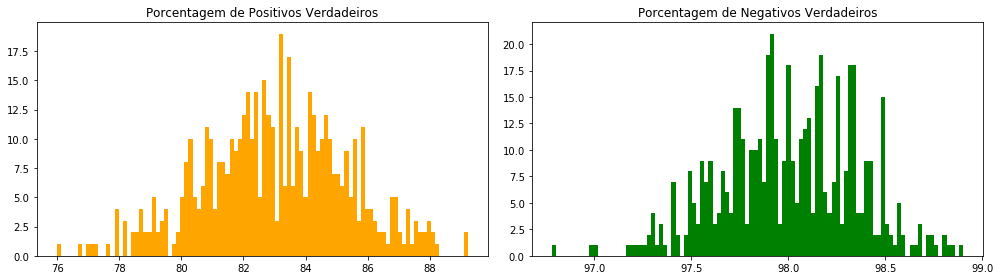

In [29]:
#Plotando histogramas finais.
fig = plt.figure(figsize=(14,4))
plt.subplot(121)
plt.hist(PV,bins=100,color="orange")
plt.title("Porcentagem de Positivos Verdadeiros")

plt.subplot(122)
plt.hist(NV,bins=100,color='green')
plt.title("Porcentagem de Negativos Verdadeiros")

plt.tight_layout()
plt.show()

In [28]:
print("A média da porcentagem de resultados positivos verdadeiros é " + str(np.mean(PV)))
print("A média da porcentagem de resultados negativos verdadeiros é " + str(np.mean(NV)))

A média da porcentagem de resultados positivos verdadeiros é 83.0244248298
A média da porcentagem de resultados negativos verdadeiros é 98.0036920386


Após rodar o classificador 500 vezes e obter os valores das porcentagens de Positivos Verdadeiros e Negativos Verdadeiros, plotamos dois histogramas, um para cada variável.

Percebemos que os histogramas se aproximam de duas normais, onde ambas são simétricas, a primeira com média aproximada de 83%, sendo assim com um grande número de Positivos Verdadeiros e a segunda com média aproximada de 98%, mostrando também precisão em relação aos Negativos Verdadeiros.

Uma forma de tornar o nosso código mais eficiente seria usar dicionários ao invés de dataframes equivalentes a grandes listas, pois o tempo de processamento do primeiro é bem menor dado que esse não precisa rodar todos os valores toda vez e somente o termo quando lhe é pedido.